## 7-1 Numpy의 polyfit으로 회귀(regression) 분석하기

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from fbprophet import Prophet
from datetime import datetime

In [3]:
pinkwink_web = pd.read_csv('../08. PinkWink Web Traffic.csv',
                           encoding = 'utf-8', thousands = ',',
                           names = ['date','hit'], index_col = 0)
pinkwink_web = pinkwink_web[pinkwink_web['hit'].notnull()]
pinkwink_web.head()

,hit
date,
16. 7. 1.,766.0
16. 7. 2.,377.0
16. 7. 3.,427.0
16. 7. 4.,902.0
16. 7. 5.,850.0


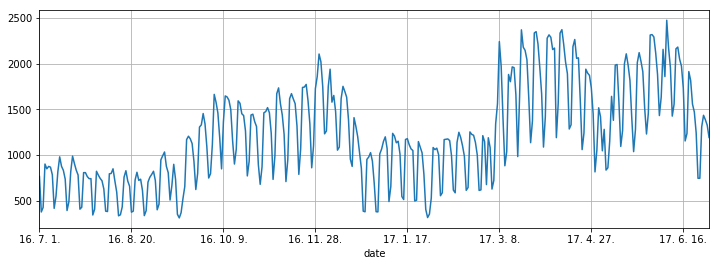

In [4]:
pinkwink_web['hit'].plot(figsize = (12,4), grid = True)

In [5]:
time = np.arange(0, len(pinkwink_web))
traffic = pinkwink_web['hit'].values

fx = np.linspace(0, time[-1], 1000)

In [6]:
def error(f,x,y) :
    return np.sqrt(np.mean((f(x)-y)**2))

In [7]:
fp1 = np.polyfit(time, traffic, 1)
f1 = np.poly1d(fp1)

fp2 = np.polyfit(time, traffic, 2)
f2 = np.poly1d(fp2)

fp3 = np.polyfit(time, traffic, 3)
f3 = np.poly1d(fp3)

fp15 = np.polyfit(time, traffic, 15)
f15 = np.poly1d(fp15)

print(error(f1, time, traffic))
print(error(f2, time, traffic))
print(error(f3, time, traffic))
print(error(f15, time, traffic))

430.85973081109626
430.62841018946943
429.5328046676293
330.4777304274343


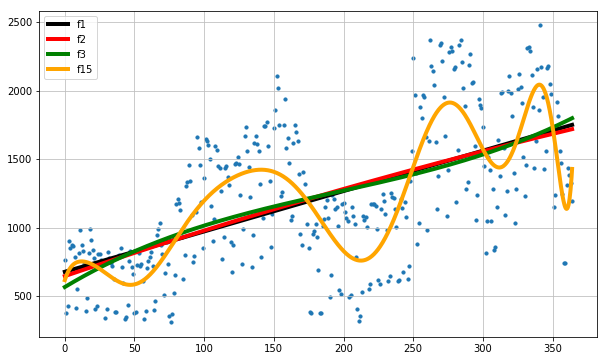

In [8]:
plt.figure(figsize = (10,6))
plt.scatter(time, traffic, s = 10)

plt.plot(fx, f1(fx), lw = 4, label = 'f1', color = 'black')
plt.plot(fx, f2(fx), lw = 4, label = 'f2', color = 'red')
plt.plot(fx, f3(fx), lw = 4, label = 'f3', color = 'green')
plt.plot(fx, f15(fx), lw = 4, label = 'f15', color = 'orange')

plt.grid(True, linestyle = '-', color = '0.75')
plt.legend(loc = 2)
plt.show()

## 7-2 Prophet 모듈을 이용한 forecast 예측

In [9]:
df = pd.DataFrame({'ds' : pinkwink_web.index, 'y' : pinkwink_web['hit']})
df.reset_index(inplace = True)

In [10]:
df.head()

,date,ds,y
0,16. 7. 1.,16. 7. 1.,766.0
1,16. 7. 2.,16. 7. 2.,377.0
2,16. 7. 3.,16. 7. 3.,427.0
3,16. 7. 4.,16. 7. 4.,902.0
4,16. 7. 5.,16. 7. 5.,850.0


In [11]:
df['ds'] = pd.to_datetime(df['ds'], format = '%y. %m. %d.')
del df['date']

In [12]:
m = Prophet(yearly_seasonality = True)
m.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [13]:
future = m.make_future_dataframe(periods=60)
future.tail()

,ds
420,2017-08-25
421,2017-08-26
422,2017-08-27
423,2017-08-28
424,2017-08-29


In [14]:
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
420,2017-08-25,912.761130,701.701746,1114.282259
421,2017-08-26,497.711704,298.683274,714.552198
422,2017-08-27,630.268176,419.776114,835.221366
423,2017-08-28,1182.888299,988.835710,1409.644626
424,2017-08-29,1218.800002,1014.781590,1437.479854


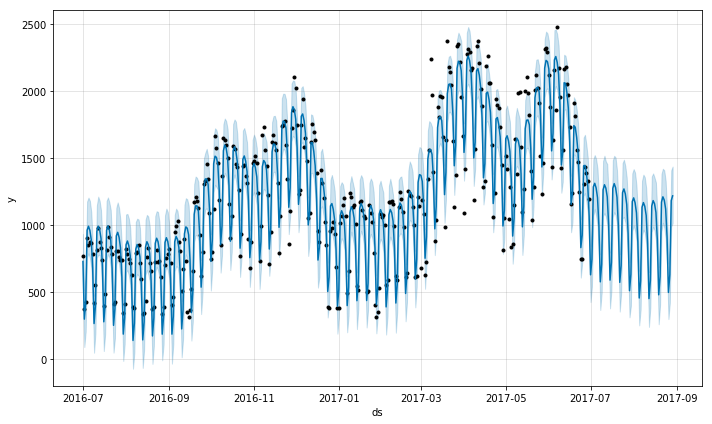

In [15]:
m.plot(forecast);

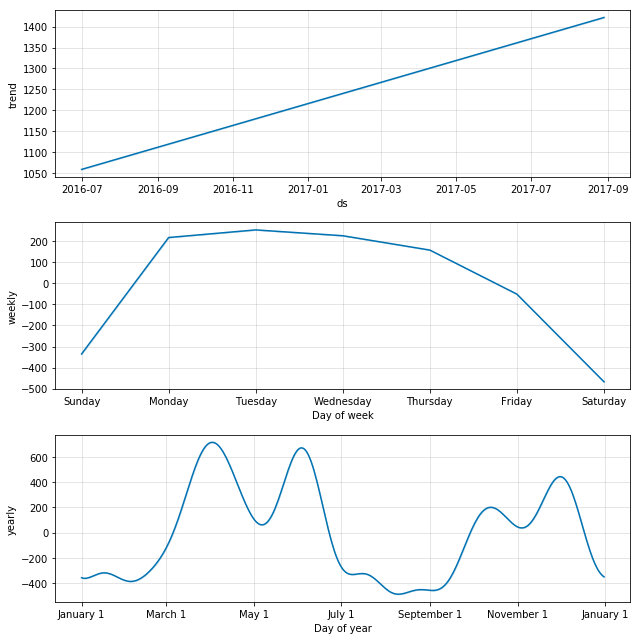

In [16]:
m.plot_components(forecast);

## 7-3 Seasonal 시계열 분석으로 주식 데이터 분석하기

In [17]:
start = datetime(2017, 1, 1)
end = datetime(2017, 12, 31)

samsung = pd.read_csv('C:/Users/jeong/Desktop/samsung.csv')
samsung.head()

,년/월/일,종가,대비,거래량(주),거래대금(원),시가,고가,저가,시가총액(백만),상장주식수(주)
0,2017/12/28,"2,548,000","80,000","179,709","453,635,894,717","2,478,000","2,548,000","2,475,000","328,942,963","129,098,494"
1,2017/12/27,"2,468,000","58,000","214,872","526,055,660,822","2,448,000","2,478,000","2,423,000","318,615,083","129,098,494"
2,2017/12/26,"2,410,000","-75,000","320,797","787,684,546,000","2,488,000","2,505,000","2,410,000","311,127,371","129,098,494"
3,2017/12/22,"2,485,000","28,000","223,993","555,690,493,000","2,470,000","2,498,000","2,462,000","320,809,758","129,098,494"
4,2017/12/21,"2,457,000","-87,000","312,486","777,078,978,780","2,550,000","2,553,000","2,455,000","317,195,000","129,098,494"


In [18]:
cols = ['년/월/일','시가','고가','저가','종가','거래량(주)']
samsung = samsung[cols]
samsung.head()

,년/월/일,시가,고가,저가,종가,거래량(주)
0,2017/12/28,"2,478,000","2,548,000","2,475,000","2,548,000","179,709"
1,2017/12/27,"2,448,000","2,478,000","2,423,000","2,468,000","214,872"
2,2017/12/26,"2,488,000","2,505,000","2,410,000","2,410,000","320,797"
3,2017/12/22,"2,470,000","2,498,000","2,462,000","2,485,000","223,993"
4,2017/12/21,"2,550,000","2,553,000","2,455,000","2,457,000","312,486"


In [19]:
samsung.rename(columns = {'년/월/일' : 'Date',
                          '시가' : 'Open',
                          '고가' : 'High',
                          '저가' : 'Low',
                          '종가' : 'Close',
                          '거래량(주)' : 'Volume'}, inplace = True)

In [20]:
samsung['Date'] = pd.to_datetime(samsung['Date'], format='%Y/%m/%d')

In [21]:
samsung = samsung.set_index('Date')
samsung = samsung.sort_values(by='Date', ascending = True)

In [22]:
samsung.head()

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-02,"1,799,000","1,812,000","1,794,000","1,805,000","93,012"
2017-01-03,"1,814,000","1,831,000","1,801,000","1,824,000","147,153"
2017-01-04,"1,825,000","1,826,000","1,805,000","1,808,000","159,435"
2017-01-05,"1,803,000","1,803,000","1,777,000","1,778,000","219,349"
2017-01-06,"1,809,000","1,822,000","1,802,000","1,810,000","177,619"


In [23]:
samsung['Open'] = samsung['Open'].str.replace(',','').astype(float)
samsung['High'] = samsung['High'].str.replace(',','').astype(float)
samsung['Low'] = samsung['Low'].str.replace(',','').astype(float)
samsung['Close'] = samsung['Close'].str.replace(',','').astype(float)
samsung['Volume'] = samsung['Volume'].str.replace(',','').astype(float)

In [24]:
samsung.head()

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-02,1799000.0,1812000.0,1794000.0,1805000.0,93012.0
2017-01-03,1814000.0,1831000.0,1801000.0,1824000.0,147153.0
2017-01-04,1825000.0,1826000.0,1805000.0,1808000.0,159435.0
2017-01-05,1803000.0,1803000.0,1777000.0,1778000.0,219349.0
2017-01-06,1809000.0,1822000.0,1802000.0,1810000.0,177619.0


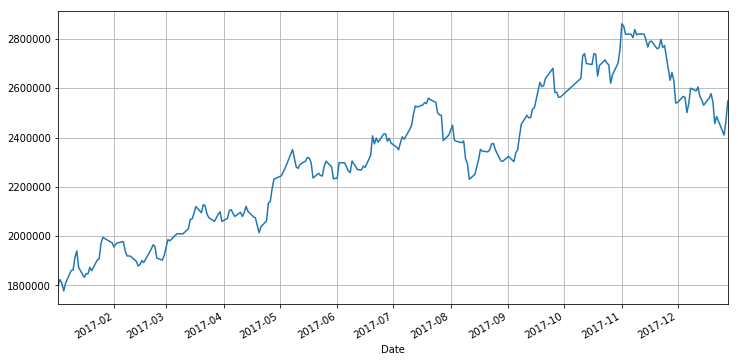

In [25]:
samsung['Close'].plot(figsize = (12,6), grid = True)
plt.show()

In [26]:
samsung_trunc= samsung[samsung.index<'2017-12-01']
samsung_trunc.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2017-11-24,2765000.0,2775000.0,2759000.0,2773000.0,90724.0
2017-11-27,2768000.0,2768000.0,2632000.0,2632000.0,362578.0
2017-11-28,2635000.0,2664000.0,2586000.0,2664000.0,269988.0
2017-11-29,2660000.0,2662000.0,2625000.0,2630000.0,191805.0
2017-11-30,2540000.0,2593000.0,2510000.0,2540000.0,592683.0


In [27]:
df = pd.DataFrame({'ds' : samsung_trunc.index, 'y' : samsung_trunc['Close']})
df.reset_index(inplace = True)
del df['Date']
df.head()

,ds,y
0,2017-01-02,1805000.0
1,2017-01-03,1824000.0
2,2017-01-04,1808000.0
3,2017-01-05,1778000.0
4,2017-01-06,1810000.0


In [28]:
m = Prophet(yearly_seasonality = True)
m.fit(df);

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [29]:
future = m.make_future_dataframe(periods = 31)
future.tail()

,ds
250,2017-12-27
251,2017-12-28
252,2017-12-29
253,2017-12-30
254,2017-12-31


In [30]:
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
250,2017-12-27,2.637323e+06,2.584305e+06,2.687536e+06
251,2017-12-28,2.641990e+06,2.593534e+06,2.688308e+06
252,2017-12-29,2.640391e+06,2.592179e+06,2.688392e+06
253,2017-12-30,2.590754e+06,2.543992e+06,2.640219e+06
254,2017-12-31,2.595650e+06,2.547676e+06,2.640935e+06


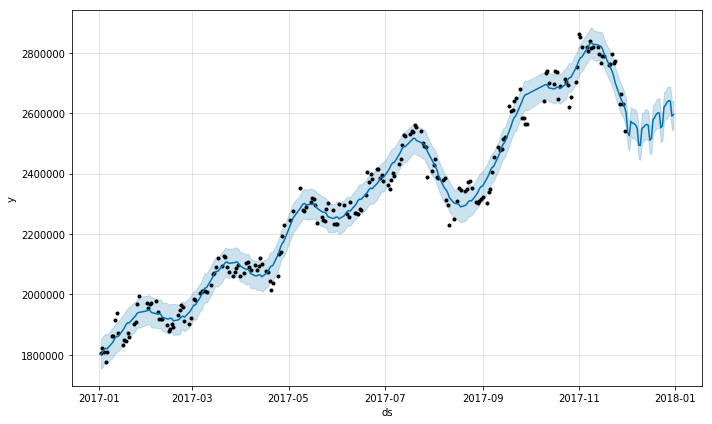

In [31]:
m.plot(forecast);

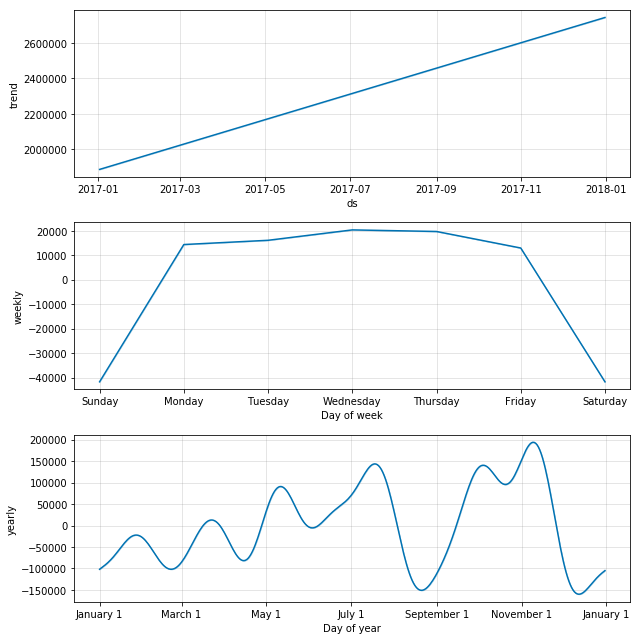

In [32]:
m.plot_components(forecast);

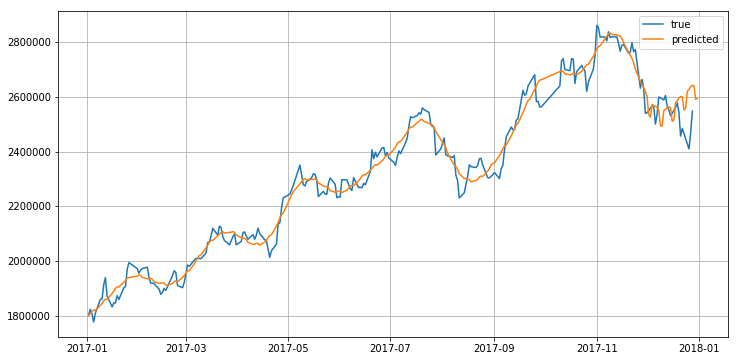

In [33]:
plt.figure(figsize = (12,6))
plt.plot(samsung.index, samsung['Close'], label = 'true')
plt.plot(forecast['ds'], forecast['yhat'], label = 'predicted')
plt.grid()
plt.legend()
plt.show()